# YÖK Atlas Veri Seti - Tutarlılık ve Veri Kalitesi Analizi

Bu notebook, `turkish-university-admissions-dataset` projesinin temelini oluşturan `department_stats.csv` dosyasındaki kontenjan, yerleştirme ve sıralama verilerinin iç tutarlılığını ve kalitesini analiz etmek amacıyla hazırlanmıştır.

### Analizin Amacı
- Toplam kontenjan (`total_quota`) ile yerleşen öğrenci (`total_enrolled`) sayısı arasındaki ilişkiyi incelemek.
- Cinsiyet dağılımının (`male` + `female`) toplam yerleşen sayısıyla eşleşip eşleşmediğini kontrol etmek.
- Yıllara göre veri tutarsızlıklarının örüntülerini ortaya çıkarmak.
- Puan ve sıralama verilerindeki eksikliklerin nedenlerini ve desenlerini anlamak.

### Analiz Özeti ve Temel Bulgular
1.  **Kontenjan Tutarlılığı:** Veri seti genel olarak kontenjan-yerleşen tutarlılığı açısından **son derece güvenilirdir**. Tespit edilen çok az sayıdaki anomali (%0.007), TÜBİTAK gibi özel yerleştirmelerle açıklanabilmektedir.
2.  **Cinsiyet Verisi Tutarlılığı:** Veri setinin en dikkat çekici anomalisi bu alandadır. **2021 yılına ait verilerin %19.3'ünde** cinsiyet toplamı ile yerleşen sayısı uyuşmamaktadır. Diğer yıllarda ise bu oran neredeyse sıfırdır. Bu durum, 2021'e özgü bir veri raporlama sorununa işaret etmektedir.
3.  **Puan ve Sıralama Verileri:** Bu alanda eksik veriler bulunmaktadır ancak bu eksiklikler rastgele değildir. **2024 yılında** kontenjanı dolmayan bölümler için sıralama verisi eksikken, **2021 yılında** ise puandan bağımsız bir sıralama verisi eksikliği gözlemlenmiştir.


### 1. Kurulum ve Veri Yükleme

Analize başlamadan önce gerekli kütüphaneleri import edip, `processed` klasöründeki temel tablolarımızı yüklüyoruz.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri Yükleme
stats = pd.read_csv('../data/processed/department_stats.csv')
depts = pd.read_csv('../data/processed/departments_normalized.csv')
dept_names = pd.read_csv('../data/processed/department_names.csv')
universities = pd.read_csv('../data/processed/universities_normalized.csv')

stats.head()
# depts.head()
# dept_names.head()
# universities.head()

,program_code,year,total_quota,total_enrolled,male,female,final_score_012,final_rank_012,final_score_018,final_rank_018,initial_placement_rate,not_registered,additional_placement,avg_obp_012,avg_obp_018
0,103390230,2024,22,22,13,9,262.81795,724933.0,NaN,NaN,100.0,3,4,360.275,NaN
1,103390149,2024,54,54,15,39,293.29473,971556.0,293.40152,970029.0,100.0,9,10,368.353,364.254
2,101370272,2024,54,54,18,36,288.33366,1040650.0,288.64722,1036166.0,100.0,9,9,377.628,375.708
3,206552026,2024,9,8,4,4,316.98351,NaN,NaN,NaN,88.9,2,1,386.365,NaN
4,107390189,2024,54,53,17,36,291.58874,NaN,291.70333,NaN,98.1,8,9,389.920,378.331


## 2. Kontenjan ve Yerleşen Sayısı Tutarlılığı

İlk ve en temel kontrolümüz, bir programa yerleşen öğrenci sayısının o program için açılan kontenjanı aşıp aşmadığıdır.


In [ ]:
# ------------------------
# toplam kontenjan >= toplam yerleşen mi?
# ------------------------

stats["quota_mismatch"] = stats["total_quota"] - stats["total_enrolled"]

mismatch_df = stats[stats["quota_mismatch"] < 0]
mismatch_df

,program_code,year,total_quota,total_enrolled,male,female,final_score_012,final_rank_012,final_score_018,final_rank_018,initial_placement_rate,not_registered,additional_placement,avg_obp_012,avg_obp_018,quota_mismatch
11220,108410336,2024,113,115,98,17,539.85314,945.0,NaN,NaN,101.8,0,0,492.032,NaN,-2
11477,102210277,2024,108,116,95,21,539.31607,1008.0,NaN,NaN,107.4,0,0,491.172,NaN,-8
31278,102210286,2024,93,96,84,12,532.61394,1858.0,NaN,NaN,103.2,0,0,488.888,NaN,-3
31479,203910381,2024,88,89,69,20,314.16806,223399.0,NaN,NaN,101.1,8,1,467.336,NaN,-1
34661,102210295,2024,77,81,46,35,531.37897,2053.0,NaN,NaN,105.2,1,0,488.911,NaN,-4
70568,203910099,2024,7,9,7,2,528.54970,2544.0,NaN,NaN,128.6,1,0,486.968,NaN,-2
115088,104810626,2024,180,181,95,86,537.19919,1242.0,NaN,NaN,100.6,0,0,494.111,NaN,-1
115215,104810617,2024,236,237,123,114,532.11949,1935.0,NaN,NaN,100.4,0,0,492.912,NaN,-1
115242,111610025,2024,67,68,37,31,536.61927,1311.0,NaN,NaN,101.5,0,0,491.200,NaN,-1


#### Bulgular ve Yorum

Yaptığımız analizde, 128.352 satır üzerinden incelendiğinde yalnızca 9 satırda **toplam yerleşen öğrenci sayısı, toplam kontenjandan yüksek** çıkmıştır. Bu satırların tamamında öğrencilerin sıralamaları oldukça yüksek (ilk 1.000–2.000 arası) olup, tek bir tanesinde sıralama daha düşük gözlemlenmiştir.

Bu durumun nedeninin YÖK Atlas verisinde bazı bölümlere **TÜBİTAK başarısı nedeniyle ek yerleşim yapılması** olarak düşünüyorum. YÖK Atlas sitesinde, bu tür durumlarda ilgili bölümlerde "Bu programa ayrıca TÜBİTAK başarısı nedeniyle ... öğrenci doğrudan yerleştirilmiştir" şeklinde uyarı notu vermektedir.

Veri setindeki `initial_placement_rate` (ilk yerleşme oranı) sütununda %100'den yüksek değerlerin bulunması da bu yüzden kaynaklanmaktadır.

Özetle:
- 128.352 satırdan yalnızca 9 satır (%0,007 civarı) ufak veri farklılıkları içerir.
- Bu farklılıklar **özel kontenjanlar ve ek yerleşimlerden kaynaklanmaktadır**.


## 3. Cinsiyet Dağılımı Tutarlılığı

İkinci önemli kontrolümüz, `male` ve `female` sütunlarının toplamının, `total_enrolled` (toplam yerleşen) sayısına eşit olup olmadığını incelemektir.

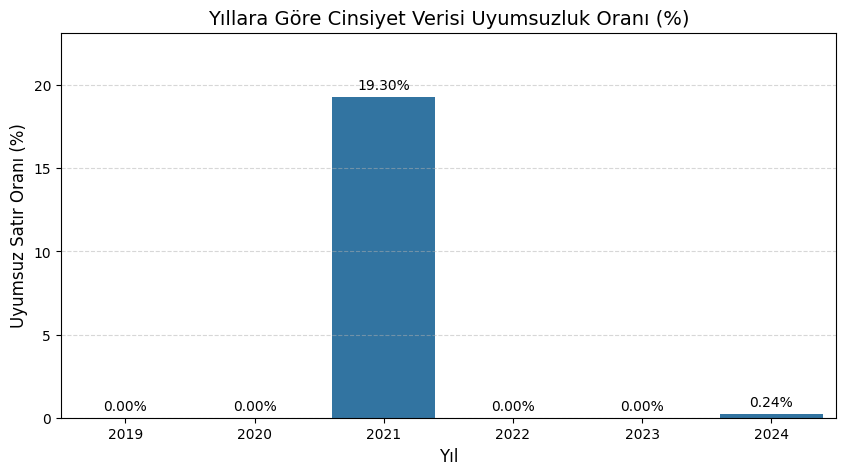

In [77]:
gender_match = stats.loc[stats["male"] + stats["female"] != stats["total_enrolled"]]

year_counts = gender_match['year'].value_counts().sort_index()
year_total = stats['year'].value_counts().sort_index()
year_percent = (year_counts / year_total * 100).fillna(0)

# Görselleştirme
plt.figure(figsize=(10,5))
bars = sns.barplot(x=year_percent.index, y=year_percent.values)

# Barların üstüne yüzdeleri yaz
for bar, pct in zip(bars.patches, year_percent.values):
    height = bar.get_height()
    bars.annotate(f'{pct:.2f}%', 
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0,3),
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=10, color='black')

plt.title("Yıllara Göre Cinsiyet Verisi Uyumsuzluk Oranı (%)", fontsize=14)
plt.xlabel("Yıl", fontsize=12)
plt.ylabel("Uyumsuz Satır Oranı (%)", fontsize=12)
plt.ylim(0, max(year_percent.values)*1.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### Bulgular ve Yorum

Analizlerimize göre, (`male` + `female`) toplamının `total_enrolled` sayısına eşit olmadığı toplam 4,140 kayıt bulunmaktadır. Bu durum yıllara göre incelendiğinde ilginç bir tablo ortaya çıkmaktadır:

*   **2019, 2020, 2022 ve 2023** yıllarında veriler **%100 tutarlıdır**.
*   **2024** yılında uyumsuzluk oranı sadece **%0.24**'tür.
*   Ancak **2021** yılında bu oran, o yıla ait verilerin **%19.3**'ünü etkileyecek kadar yüksektir.

**Peki Neden Kaynaklanıyor?**
Diğer yıllardaki yüksek tutarlılık, bu durumun 2021 yılına özgü bir veri raporlama anomalisinden kaynaklandığını düşündürüyor. Büyük ihtimalle 2021 yılında, `male`/`female` verileri sadece **ilk yerleştirme sonrası kesin kayıt yaptıran** öğrencileri yansıtırken, `total_enrolled` sütunu **ek yerleştirmeler dahil nihai sonucu** gösterecek şekilde güncellenmiştir. Yani iki sütun farklı anlardaki veriyi temsil etmektedir.

**Örnek Durum:** Bir bölüme 25 kişi yerleşir (`total_enrolled`: 25), ancak 3'ü kayıt yaptırmaz. Cinsiyet dağılımı sadece kayıt yaptıran 22 kişiyi (Örn: 4 Kız + 18 Erkek) gösterir. Daha sonra 3 kişi ek yerleştirme ile gelip kontenjan dolsa bile cinsiyet verisi 22 olarak kalabilir. 2021 ve 2024 yılının bir kısmında bu tür durumlar yaşanmış ama diğer yıllarda cinsiyet verileri tamamen tutarlıdır.  

Bu durumun pratik örneklerini aşağıdaki YÖK Atlas bağlantılarından "Genel Bilgiler" ve "Yerleşenlerin Cinsiyet Dağılımı" sekmelerini karşılaştırarak görebilirsiniz:

*   **Örnek 1:** [https://yokatlas.yok.gov.tr/lisans.php?y=203851971](https://yokatlas.yok.gov.tr/lisans.php?y=203851971)
*   **Örnek 2:** [https://yokatlas.yok.gov.tr/lisans.php?y=300490483](https://yokatlas.yok.gov.tr/lisans.php?y=300490483)

**Analizler İçin Not:**
Bu nedenle, **özellikle 2021 yılına ait cinsiyet verileriyle çalışırken dikkatli olunmalıdır.** Diğer yıllar için cinsiyet dağılımı verileri yüksek oranda güvenilirdir.

## 4. Eksik Veri Analizi:

Bu bölümde, sadece puan/sıralama değil, tüm veri setindeki eksiklikleri ve bu eksikliklerin arkasındaki desenleri inceliyoruz.

#### 4.1. Genel Eksik Veri Özeti
Öncelikle, hangi sütunlarda ne kadar eksik veri olduğunu genel olarak görelim.

,Eksik Kayıt Yüzdesi (%)
final_rank_018,61.675704
final_score_018,60.925424
avg_obp_018,47.595674
final_rank_012,11.091374
final_score_012,10.027113
avg_obp_012,3.213818


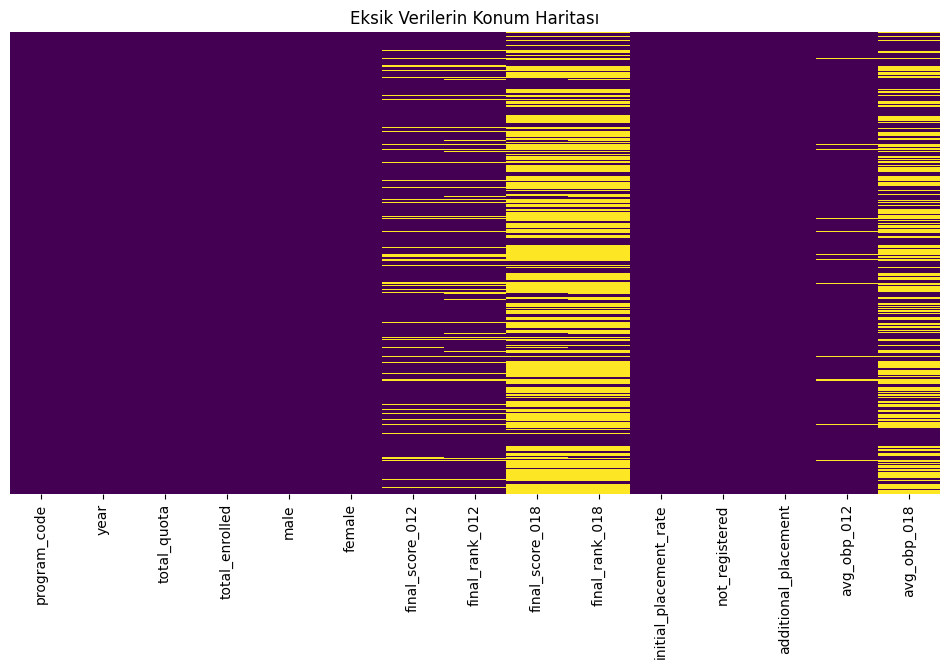

In [86]:
# Yüzdesel olarak eksik veri
missing_percentage = (stats.isnull().sum() / len(stats) * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({'Eksik Kayıt Yüzdesi (%)': missing_percentage})
display(missing_df[missing_df['Eksik Kayıt Yüzdesi (%)'] > 0])

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.heatmap(stats.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Eksik Verilerin Konum Haritası')
plt.show()

#### 4.2. Puan ve Sıralama Birlikteliği Anomalisi
Bir bölümün taban puanı ve taban sıralama verilerinin birlikte var olup olmadığını kontrol ediyoruz. Bu analiz, veri setindeki eksikliklerin rastgele mi yoksa belirli bir desene mi sahip olduğunu anlamamıza yardımcı olacaktır.

In [80]:
# Sıralama var ama puan yok
rank_no_score = stats.loc[stats['final_rank_012'].notna() & stats['final_score_012'].isna()]
print("Sıralaması Olup Puanı Olmayan Kayıtlar (Yıllara Göre):")
print(rank_no_score["year"].value_counts())

print("\n" + "-" * 25 + "\n")

# Puan var ama sıralama yok
score_no_rank = stats.loc[stats['final_rank_012'].isna() & stats['final_score_012'].notna()]
print("Puanı Olup Sıralaması Olmayan Kayıtlar (Yıllara Göre):")
print(score_no_rank["year"].value_counts())

Sıralaması Olup Puanı Olmayan Kayıtlar (Yıllara Göre):
year
2021    656
Name: count, dtype: int64

-------------------------

Puanı Olup Sıralaması Olmayan Kayıtlar (Yıllara Göre):
year
2024    2022
Name: count, dtype: int64


#### Bulgular ve Yorum

Normalde bir bölümün taban puanı varsa taban sıralamasının da olması beklenir. Ama bazı bölümlerde puan bilinirken sıralama bilgisi eksik, bazılarında ise sıralama bilinirken puan bilgisi eksik olabiliyor. (Sadece 0.12 katsayısı üzerinden inceledim 0.18'e de bakabilirsiniz)

1.  **Sıralaması Olup Puanı Olmayan Kayıtlar:**
    *   Toplam **656** kayıt bulundu.
    *   Bu kayıtların **tamamı 2021 yılına aittir.**

2.  **Puanı Olup Sıralaması Olmayan Kayıtlar:**
    *   Toplam **2,022** kayıt bulundu.
    *   Bu kayıtların **tamamı 2024 yılına aittir** ve kontenjanı dolmamış programlardır.

**Değerlendirme ve Sonraki Adımlar:**
Bu durum, YÖK Atlas'ta dolmayan bölümler için son giren kişinin puanını yazmak yerine "Dolmadı" yazmasından dolayı kaynaklanmaktadır. Ancak yine de YÖK Atlas'ta "Yerleşen Son Kişinin Profili" kısmından bu veriler alınabilir.

Veri setine gelecekte **"Yerleşen Son Kişinin Profili"** sayfasından alınacak veriler eklenecektir. Bu yeni veri, 2021 ve 2024 yıllarındaki eksikliklerin bir kısmını doldurabilir. Ancak, "Son Giren Profil" sayfası her program için yalnızca tek bir puan/sıra (0.12 veya 0.18) içerdiğinden, mevcut tablodaki tüm boşlukların dolması beklenmemelidir.

**Analizler İçin Not:** Bu veri setiyle çalışırken, özellikle **2021 yılındaki eksik puan verileri** ve **2024 yılındaki eksik sıralama verileri** göz önünde bulundurulmalıdır.

Devam edeceğim...